In [20]:
from sklearn.datasets import load_iris
import sklearn as skl
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree #https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_text
import numpy as np
from sklearn import metrics

In [23]:
iris = load_iris()
X, y = iris.data, iris.target

In [24]:
df = pd.read_csv("iris.data.csv", delimiter=",", names=['sepal length (cm)',
                                                         'sepal width (cm)',
                                                         'petal length (cm)',
                                                         'petal width (cm)',
                                                         'classe'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


    1- Calculer les statistiques (moyenne et écart-type) des quatre variables explicatives :
        longueur de sépale, largueur de sépale, longueur de pétale et largeur de pétale.

In [30]:
df.describe(include='all').drop("classe", axis=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
unique,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000


    2- Combien y a-t-il d’exemples de chaque classe ?

In [27]:
df['classe'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: classe, dtype: int64

    3- Décomposer votre jeu de données en 70% pour l’apprentissage, 30% pour le test

In [32]:
#subdiviser les données en échantillons d'apprentissage et de test
dfTrain, dfTest = train_test_split(df,test_size=45,random_state=1,stratify=df.classe)

#vérification des dimensions
print(dfTrain.shape)
print(dfTest.shape)

(105, 5)
(45, 5)


    4- Construire votre arbre de décision

[Text(0.3, 0.9285714285714286, 'petal length (cm) <= 2.6\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(0.2, 0.7857142857142857, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.4, 0.7857142857142857, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(0.3, 0.6428571428571429, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.5, 0.6428571428571429, 'petal width (cm) <= 1.75\ngini = 0.219\nsamples = 40\nvalue = [0, 5, 35]'),
 Text(0.2, 0.5, 'petal length (cm) <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.1, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.3, 0.35714285714285715, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.2, 0.21428571428571427, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.21428571428571427, 'petal length (cm) <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.3, 0.07142857142857142, 'gini = 0.0\nsampl

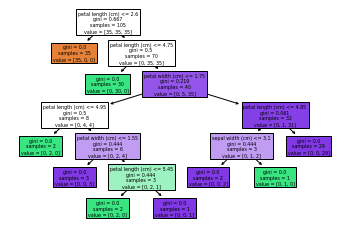

In [37]:
#instanciation de l'arbre
arbreFirst = DecisionTreeClassifier()

#construction de l'arbre
arbreFirst.fit(X = dfTrain.iloc[:,:-1], y = dfTrain.classe)

#affichage graphique de l'arbre - depuis sklearn 0.21
plot_tree(arbreFirst,feature_names = list(df.columns[:-1]),filled=True)

    5- Visualiser votre arbre de décision

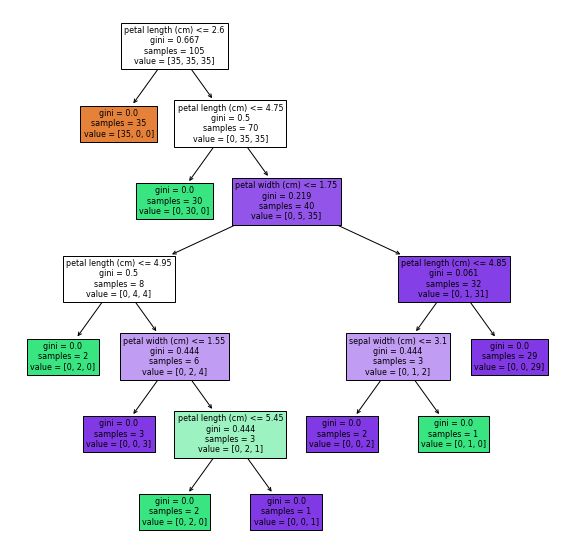

In [38]:
#affichage plus grand pour une meilleure lisibilité
plt.figure(figsize=(10,10))
plot_tree(arbreFirst,feature_names = list(df.columns[:-1]),filled=True)
plt.show()

    6- Utiliser le modèle pour la prédiction du jeu test

In [39]:
#prédiction sur l'échantillon test
predFirst = arbreFirst.predict(X=dfTest.iloc[:,:-1])

#distribution des predictions
print(np.unique(predFirst,return_counts=True))

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([15, 16, 14], dtype=int64))


    7- Calculer le score

In [40]:
print(metrics.accuracy_score(dfTest.classe,predFirst))

0.9777777777777777


    8- Changez les valeurs des paramètres max_depth et min_samples_leaf. Que constatezvous ?

[Text(0.5, 0.5, 'gini = 0.656\nsamples = 8\nvalue = [3, 2, 3]')]

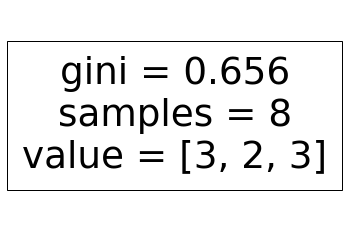

In [51]:
#instanciation de l'arbre
arbreFirst = DecisionTreeClassifier(max_depth=2,min_samples_leaf=15)

#construction de l'arbre
arbreFirst.fit(X = dfTrain.iloc[:,:-1], y = dfTrain.classe)

#affichage graphique de l'arbre - depuis sklearn 0.21
plot_tree(arbreFirst,feature_names = list(df.columns[:-1]),filled=True)

In [52]:
#prédiction sur l'échantillon test
predFirst = arbreFirst.predict(X=dfTest.iloc[:,:-1])

print(metrics.accuracy_score(dfTest.classe,predFirst))

0.33098591549295775


max depth nous permet de limite la profondeur 'des racines' de notre arbre. l'autre paramètre permet de définir un nombre minimum de donnée présent nécessaaire afin de pouvoir être une node.

    9- Le problème ici étant particulièrement simple, refaites une division apprentissage/test avec 5% des données en apprentissage et 95% test.
        a. Calculez le taux d’éléments mal classifiés sur l’ensemble de test.

In [47]:
#subdiviser les données en échantillons d'apprentissage et de test
dfTrain, dfTest = train_test_split(df,test_size=142,random_state=1,stratify=df.classe)
predFirst = arbreFirst.predict(X=dfTest.iloc[:,:-1])
print(metrics.accuracy_score(dfTest.classe,predFirst))

0.9577464788732394


On a déjà un score de validation excellant pour la taille de l'entraînement.